## 모듈 불러오기

In [2]:
!pip install plotly

In [3]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc, animation
from scipy import stats

plt.rcParams['axes.unicode_minus'] = False # unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # 한글 사용

import plotly as py
import plotly.graph_objects as go 
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
mapbox_access_token = 'pk.eyJ1IjoiamFja2x1byIsImEiOiJjaXhzYTB0bHcwOHNoMnFtOWZ3YWdreDB3In0.pjROwb9_CEuyKPE-x0lRUw'

import warnings
warnings.filterwarnings(action='ignore') # 경고창 무시

import time as t
from datetime import datetime

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

def frame_args(d1,d2):
    return {
            "frame": {"duration": d1},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": d2, "easing": "linear"},
        }

## 서울 데이터 불러오기

In [4]:
infected_df = pd.read_csv('../input/서울시 코로나19 확진자 현황.csv', encoding='euc-kr')
movement_04 = pd.read_csv('../input/Floating_Population_2004.csv')
movement_05 = pd.read_csv('../input/Floating_Population_2005.csv')
movement_06 = pd.read_csv('../input/Floating_Population_2006.csv')
movement_07 = pd.read_csv('../input/Floating_Population_2007.csv')
Seoul_lat_lon = pd.read_csv('../input/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv', encoding='euc-kr')

In [5]:
infected_province = infected_df[['확진일','지역']]
movement_province4 = movement_04[['일자','군구','유동인구수']]
movement_province5 = movement_05[['일자','군구','유동인구수']]
movement_province6 = movement_06[['일자','군구','유동인구수']]
movement_province7 = movement_07[['일자','군구','유동인구수']]

In [6]:
infected_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   확진일     4131 non-null   object
 1   지역      4131 non-null   object
dtypes: object(2)
memory usage: 64.7+ KB


In [7]:
# 서울 시 유동인구 데이터
m_p_4 = movement_province4.pivot_table('유동인구수', index='일자',columns='군구', aggfunc=sum)
m_p_5 = movement_province5.pivot_table('유동인구수', index='일자',columns='군구', aggfunc=sum)
m_p_6 = movement_province6.pivot_table('유동인구수', index='일자',columns='군구', aggfunc=sum)
m_p_7 = movement_province7.pivot_table('유동인구수', index='일자',columns='군구', aggfunc=sum)
mp4567= m_p_4.append(m_p_5).append(m_p_6).append(m_p_7)
mp4567.columns

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='군구')

In [8]:
# 일자 datetime인덱스로 조정

mp4567['일자'] = pd.date_range("2020-04-01", "2020-07-31")
mp4567.set_index('일자', inplace=True)
mp4567

군구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
일자,,,,,,,,,,,,,,,,,,,,,
2020-04-01,14944020,7934450,5624820,10571700,9401700,6816880,8565270,5714760,9431880,5666470,...,6392860,8127720,12582200,7769940,9864500,5184530,7919310,5496890,5776450,6953700
2020-04-02,14939240,7917550,5621860,10567340,9381370,6807500,8545290,5691220,9410400,5651510,...,6384520,8100730,12550290,7753060,9837980,5171930,7902260,5484130,5767350,6924750
2020-04-03,14824170,7923530,5619980,10540320,9361710,6821490,8490770,5622840,9387850,5645750,...,6361450,8069020,12512150,7739990,9770610,5213920,7894820,5411050,5679210,6913500
2020-04-04,11799100,8194020,5945760,10645880,9888740,7093530,8236260,4897970,9936100,6025390,...,5867670,8289680,12247760,8153590,8410600,4803310,8488040,4087520,3504600,7281910
2020-04-05,10901220,8235610,6066410,10692680,10070660,7091860,8345210,4910770,10123520,6199910,...,5748080,8423890,12171500,8285740,8248120,4674440,8675850,3723440,3047560,7440280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,15241240,7750430,5509980,10449370,9120320,6628120,8493450,5687460,9148580,5568600,...,6199420,7847330,12358930,7606200,9832240,5141490,7791750,5639670,6005390,6848180
2020-07-28,15484510,7725750,5483660,10423180,9093940,6616530,8439850,5646030,9103210,5531840,...,6230380,7828050,12385630,7578940,9862930,5188840,7734390,5782850,6132130,6790660
2020-07-29,15406410,7744930,5514880,10450050,9135590,6641090,8517170,5631090,9133850,5556860,...,6220390,7854770,12380510,7604680,9857260,5194020,7749800,5754540,6033830,6824730


In [9]:
# plotly
# 5.29는 전산오류일듯
# 4월 부터의 서울시 전체 유동인구량
# 5월 6일 부터 시행된 생활속 거리두기에서 해제되고 얼마 지나지 않아 다시 매우 활발히 활동하는 것을 볼 수 있음.
mp4567_sum = mp4567.sum(axis=1)
fig = go.Figure()
fig.add_trace(go.Scatter(x=mp4567_sum.index , y=mp4567_sum, marker_color='orange', name='확진자 증감 시도표'))
fig

In [10]:
# 5678월의 서울시 확진자 수

infected567 = infected_province[(infected_province.확진일 >= '5.06.') & (infected_province.확진일 < '9.1.')]
infected567['수'] = 1
for i in range(len(infected567)):
    tmp = infected567.iloc[i, 0].replace('.','')
    if len(tmp) != 3:
        infected567.iloc[i, 0] = tmp[0] + '0' +tmp[-1]
    else:
        infected567.iloc[i, 0] = tmp



# 서울시 전체의 확진자 수 추이
infected_num = infected567.groupby('확진일').sum()
infected_num.reset_index()
infected_num['확진일'] = pd.date_range("2020-05-08", "2020-09-02")
infected_num.set_index('확진일', inplace=True)
# infected_num
infected567

,확진일,지역,수
0,902,강서구,1
1,902,강동구,1
2,902,노원구,1
3,902,서초구,1
4,902,노원구,1
...,...,...,...
3489,508,용산구,1
3490,508,용산구,1
3491,508,용산구,1
3492,508,용산구,1


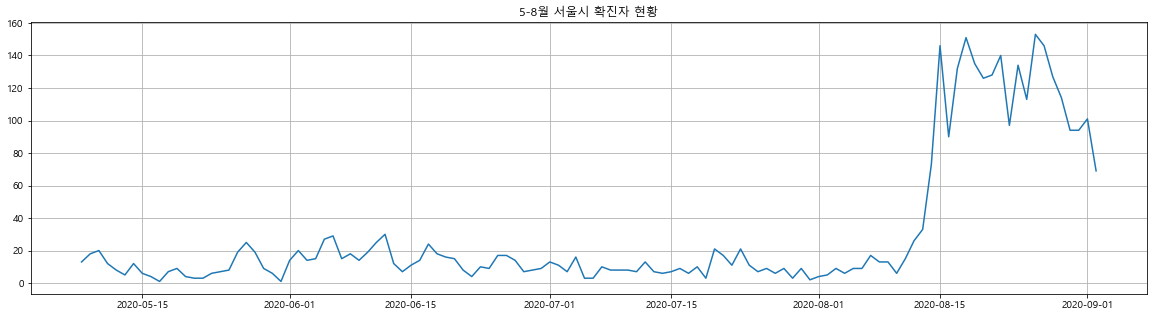

In [11]:
# matplot
plt.figure(figsize=(20, 5))
plt.plot(infected_num)
plt.title('5-8월 서울시 확진자 현황')
plt.grid()
plt.show()

In [12]:
# plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=infected_num.index , y=infected_num.수, marker_color='orange', name='확진자 수'))
fig

In [13]:
# 서울시 지역에 따른 확진자 수 (타 도시 포함)

infected = infected567.pivot_table('수', index=['확진일'], columns='지역', aggfunc=sum)
infected.reset_index()
infected['확진일'] = pd.date_range("2020-05-08", "2020-09-02")
infected.set_index('확진일', inplace=True)
infected.fillna(0, inplace=True)
infected = infected.astype('int64')
infected

지역,강남구,강동구,강북구,강서구,경기,경기광주,고양시,관악구,광명,광진구,...,중구,중구(노원),중구(은평),중랑구,타시도,포천,하남,화성,확인(구로),확인(동작)
확진일,,,,,,,,,,,,,,,,,,,,,
2020-05-08,0,1,0,0,0,0,0,3,0,0,...,1,0,0,0,0,0,0,0,0,0
2020-05-09,1,0,0,2,0,0,0,1,0,2,...,0,0,0,1,0,0,0,0,0,0
2020-05-10,4,1,1,0,0,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
2020-05-11,0,0,1,2,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2020-05-12,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-29,4,3,4,4,0,0,0,7,0,6,...,2,0,0,5,0,0,0,0,0,0
2020-08-30,3,1,1,4,0,0,0,8,0,1,...,2,0,0,3,0,0,0,0,0,0
2020-08-31,6,2,4,5,0,0,0,8,0,1,...,0,0,0,5,0,0,0,0,0,0


In [14]:
# 서울시에서 발생하지 않은 확진자는 제외.
seo = []
for prov in infected567.지역.unique():
    if prov not in np.array(mp4567.columns.to_list()):
        seo.append(prov)
    
not_seoul = [x for x in infected567.지역.unique() if x in seo]
seoul = [x for x in infected567.지역.unique() if x not in seo]

print(not_seoul)
print((seoul))

['타시도', '경기', '기타', '중구(노원)', '확인(동작)', '확인(구로)', '중구(은평)', '부천시', '고양시', '경기광주', '성남시', '하남', '화성', '안양시', '포천', '대구', '용인시', '광명', '대전', '남양주시', '군포', '의정부', '주소불명', '안산', '수원시', '김포', '인천시', '양주시', '양평', '구리', '의왕', '부평']
['강서구', '강동구', '노원구', '서초구', '관악구', '강남구', '강북구', '은평구', '성북구', '중구', '광진구', '양천구', '송파구', '서대문구', '동대문구', '중랑구', '마포구', '성동구', '영등포구', '도봉구', '동작구', '종로구', '용산구', '금천구', '구로구']


In [15]:
# 서울시 지역에 따른 확진자 수 (타 도시 미포함)

infected_Seoul = infected.drop(not_seoul, axis=1)
# infected_Seoul.astype('int64')
infected_Seoul

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
확진일,,,,,,,,,,,,,,,,,,,,,
2020-05-08,0,1,0,0,3,0,0,0,0,0,...,0,0,0,0,0,4,0,1,1,0
2020-05-09,1,0,0,2,1,2,0,0,0,1,...,0,2,1,0,0,4,0,0,0,1
2020-05-10,4,1,1,0,3,1,0,0,0,0,...,1,1,1,1,0,3,0,0,0,0
2020-05-11,0,0,1,2,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2020-05-12,0,0,0,0,1,0,0,0,1,1,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-29,4,3,4,4,7,6,5,1,6,1,...,0,5,10,2,8,0,2,0,2,5
2020-08-30,3,1,1,4,8,1,1,2,5,5,...,2,3,5,6,5,0,7,4,2,3
2020-08-31,6,2,4,5,8,1,1,2,12,5,...,2,5,2,5,0,1,5,2,0,5


In [16]:
# 확진일을 datetime으로 바꾸고 서울시 외의 지역은 삭제

infected_tmp = infected567.copy()
date = ['2020-0'+i[0]+'-'+i[1:] for i in infected_tmp.확진일]
# print(date)
infected_tmp.확진일 = date
drop=[]
for ns in not_seoul:
    infected_tmp.drop(infected_tmp[infected_tmp.지역 == ns].index, inplace=True)
infected_tmp[:20]

,확진일,지역,수
0,2020-09-02,강서구,1
1,2020-09-02,강동구,1
2,2020-09-02,노원구,1
3,2020-09-02,서초구,1
4,2020-09-02,노원구,1
5,2020-09-02,강동구,1
6,2020-09-02,강동구,1
7,2020-09-02,강동구,1
8,2020-09-02,강동구,1
10,2020-09-02,관악구,1


In [17]:
# 서울시의 모든 도시를반영하기 위해 날짜 별로 지역과 수1을 넣어줌 --> 나중에 전체에서 1빼줄거임
# 모든 날을 반영해야 하므로 
for date in pd.date_range("2020-05-08", "2020-09-02"):
    date = str(date)[:10]
    for emp in seoul:  
        dic = {'확진일': date, '지역': emp, '수':1}
        infected_tmp = infected_tmp.append(dic, ignore_index=True)

infected_tmp
# pd.merge(infected_tmp, Seoul_lat_lon, left_on='지역', right_on='군구', how='inner')


,확진일,지역,수
0,2020-09-02,강서구,1
1,2020-09-02,강동구,1
2,2020-09-02,노원구,1
3,2020-09-02,서초구,1
4,2020-09-02,노원구,1
...,...,...,...
6201,2020-09-02,동작구,1
6202,2020-09-02,종로구,1
6203,2020-09-02,용산구,1
6204,2020-09-02,금천구,1


In [18]:
# 각 지역별로 확진일 (5/8 ~ 9/2)을 나타내어 plotly express로 지도시각화를 수행한다.
infected_pro = infected_tmp.groupby(['지역','확진일']).sum()-1
infected_pro = infected_pro.reset_index()
infected_pro

,지역,확진일,수
0,강남구,2020-05-08,0
1,강남구,2020-05-09,1
2,강남구,2020-05-10,4
3,강남구,2020-05-11,0
4,강남구,2020-05-12,0
...,...,...,...
2945,중랑구,2020-08-29,5
2946,중랑구,2020-08-30,3
2947,중랑구,2020-08-31,5
2948,중랑구,2020-09-01,7


In [19]:
len(pd.date_range("2020-05-08",'2020-09-02'))

118

##  서울시 도시별 위도 경도 데이터

In [20]:
Seoul_lat_lon = Seoul_lat_lon[['시군구명_한글','위도','경도']].sort_values(by='시군구명_한글').reset_index().drop('index', axis=1)
Seoul_lat_lon.rename(columns={'시군구명_한글' : '지역'}, inplace=True)
Seoul_lat_lon

,지역,위도,경도
0,강남구,37.495985,127.066409
1,강동구,37.549208,127.146482
2,강북구,37.646995,127.014716
3,강서구,37.565762,126.822656
4,관악구,37.465399,126.943807
...,...,...,...
20,용산구,37.531101,126.981074
21,은평구,37.617612,126.922700
22,종로구,37.599100,126.986149
23,중구,37.557945,126.994190


In [21]:
# 합칠 위경도 데이터  ---> 안됨 ----> 행을 늘린 후 pro의 groupby를 풀어서 합치기 가능
latlon2 = Seoul_lat_lon[['위도','경도']].copy()
latlon = pd.DataFrame(columns=['위도','경도'])
for i in range(len(latlon2)):
    for j in range(0,118):
        latlon=latlon.append(latlon2.iloc[i], ignore_index=True)

latlon

,위도,경도
0,37.495985,127.066409
1,37.495985,127.066409
2,37.495985,127.066409
3,37.495985,127.066409
4,37.495985,127.066409
...,...,...
2945,37.595379,127.093967
2946,37.595379,127.093967
2947,37.595379,127.093967
2948,37.595379,127.093967


In [22]:
infected_pro[['위도','경도']] = latlon
infected_pro

,지역,확진일,수,위도,경도
0,강남구,2020-05-08,0,37.495985,127.066409
1,강남구,2020-05-09,1,37.495985,127.066409
2,강남구,2020-05-10,4,37.495985,127.066409
3,강남구,2020-05-11,0,37.495985,127.066409
4,강남구,2020-05-12,0,37.495985,127.066409
...,...,...,...,...,...
2945,중랑구,2020-08-29,5,37.595379,127.093967
2946,중랑구,2020-08-30,3,37.595379,127.093967
2947,중랑구,2020-08-31,5,37.595379,127.093967
2948,중랑구,2020-09-01,7,37.595379,127.093967


In [23]:
# 기간 내 한 지역에서 최대 확진자
max_range_mean = np.mean(list(map(max, infected_Seoul.values)))
max_range = max(list(map(max, infected_Seoul.values)))
max_range = max_range - max_range_mean
max_range= int(max_range)
max_range

32

In [24]:
# 지도에서 사용할 데이터
infected_pro

,지역,확진일,수,위도,경도
0,강남구,2020-05-08,0,37.495985,127.066409
1,강남구,2020-05-09,1,37.495985,127.066409
2,강남구,2020-05-10,4,37.495985,127.066409
3,강남구,2020-05-11,0,37.495985,127.066409
4,강남구,2020-05-12,0,37.495985,127.066409
...,...,...,...,...,...
2945,중랑구,2020-08-29,5,37.595379,127.093967
2946,중랑구,2020-08-30,3,37.595379,127.093967
2947,중랑구,2020-08-31,5,37.595379,127.093967
2948,중랑구,2020-09-01,7,37.595379,127.093967


## 확진자 수 추이 지도

In [25]:
# 지도에서 사용할 데이터 프레임
infected_pro

,지역,확진일,수,위도,경도
0,강남구,2020-05-08,0,37.495985,127.066409
1,강남구,2020-05-09,1,37.495985,127.066409
2,강남구,2020-05-10,4,37.495985,127.066409
3,강남구,2020-05-11,0,37.495985,127.066409
4,강남구,2020-05-12,0,37.495985,127.066409
...,...,...,...,...,...
2945,중랑구,2020-08-29,5,37.595379,127.093967
2946,중랑구,2020-08-30,3,37.595379,127.093967
2947,중랑구,2020-08-31,5,37.595379,127.093967
2948,중랑구,2020-09-01,7,37.595379,127.093967


## 확진자 수 추이 지도시각화 - plotly.express 모듈 사용 

In [28]:
# 날자를 기준으로 애니매이션이 진행되고 모든 날자에 대해 장소와 위,경도는 중복하여 데이터를 만든다.
# 숫자는 매 날자마다 달라진다. -- color,size가 환자수에 따라 달라진다.

fig = px.scatter_mapbox(infected_pro , lat="위도", lon="경도",
            animation_frame = '확진일',  animation_group = '지역',
            color="수", size="수", range_color=(0,25), 
            color_continuous_scale=px.colors.carto.Redor, 
            size_max=70, hover_name='지역', 
            hover_data = ['위도', '경도', '수'], 
            opacity = 0.5,
            title = '- 사랑제일교회 외 교회관련 top3 (지역) -- 관악/ 노원/ 송파|| 사랑제일교회 관련top3 (지역) -- 성북/ 노원/ 송파',
                       
             width=1000, height=700)


fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37.5642135,
            lon=127.0016985
        ),
        style = 'outdoors',
        pitch=0,
        zoom=9.7
        
    ),
)
fig.write_html("../output/infected_Seoul_5-8.html")


fig.show()





##  plotly.graph_objects 모듈을 사용하여 지도 나타내기(X)

In [ ]:
import plotly.graph_objects as go

# mapbox_access_token = open(".mapbox_token").read()
fig_dict = dict(data = [], layout = {}, frames = [])


fig = go.Figure(go.Scattermapbox(
        lat=Seoul_lat_lon.위도,
        lon=Seoul_lat_lon.경도,
    
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=20,
#             color=,
            sizeref = 1000, opacity = 0.5,
            cmin = 0, cmax = max_range, autocolorscale = False,
            colorscale = px.colors.carto.Redor
        ),
        text=Seoul_lat_lon.지역,
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37.5642135,
            lon=127.0016985
        ),
        style = 'outdoors',
        pitch=0,
        zoom=9.5
    ),
)

fig.show()

### 교회관련 집단감염 수

In [ ]:
# 사랑제일교회 제외한 교회관련 확진자
church=['구로구 교회 관련', '용인시 우리제일교회 관련',
        '수도권 개척교회 관련', '용인시 우리제일교회',
        '노원구 빛가온교회 관련', '왕성교회 관련',
        '여의도 순복음교회 관련', '송파구 교회관련',
        '순복음 강북교회', '영등포구 권능교회']

In [ ]:
infected_church = pd.DataFrame(columns=['지역','접촉력'])
for i in range(len(infected_df)):
    tmp = infected_df[['지역','접촉력']].iloc[i,1]
    if tmp in church:
        infected_church = infected_church.append(infected_df[['지역','접촉력']].iloc[i])
        
infected_church

In [ ]:
# 교회집단감염 목록

infected_church['수'] = 1
infected_church

In [ ]:
non_sarang = infected_church.groupby(['지역']).sum().sort_values(by='수', ascending=False)
non_sarang

In [ ]:
non_sarang.iloc[:10]

In [ ]:
schurch= ['성북구 사랑제일교회 관련']
infected_sarang = pd.DataFrame(columns=['지역','접촉력'])
for i in range(len(infected_df)):
    tmp = infected_df[['지역','접촉력']].iloc[i,1]
    if tmp in schurch:
        infected_sarang = infected_sarang.append(infected_df[['지역','접촉력']].iloc[i])
        
infected_sarang
# 교회집단감염 목록

infected_sarang['수'] = 1
infected_sarang

sarang = infected_sarang.groupby(['지역']).sum().sort_values(by='수', ascending=False)
sarang

sarang.iloc[:10]

- 사랑제일교회가 아닌 교회의 확진자수 top5 (지역) -- 관악구/ 노원구/ 송파구/ 구로구/ 영등포구
- 사랑제일교회 관련 확진자 수 top5 (지역) -- 성북구/ 노원구/ 송파구/ 강북구/ 은평구